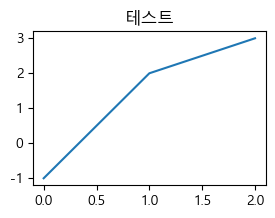

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 문제 정의
- 산불 발생 현황
- 산불 피해 현황
- 산불 주요 원인

## 데이터 수집

- 산불 발생 및 피해 현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13601_A020%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 데이터 프레임 생성

In [3]:
# ----------------------------------------
# 데이터프레임 생성
#  - header : 헤더설정(중첩헤더 설정)
# ----------------------------------------

data_file = 'data/산불데이터/산불피해_현황_20250406123339.csv'
df = pd.read_csv(data_file, header=[1,2])
df


시점 원인 (건)                                                         산불피해  \
      시점     합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
0   1995    630   312    -    138     -     -    34     18     -  128    630   
1   1996    527   248    -     73     -     -    38     30     -  138    527   
2   1997    524   247    -    103    41    29    33     10     -   61    524   
3   1998    265   104    -     65    24    13    16     11     -   32    265   
4   1999    315   156    -     57    13    21    20     10     -   38    315   
5   2000    729   312    -    134    68    63    47     18     -   87    729   
6   2001    785   354    -    143    47    88    45     24     -   84    785   
7   2002    599   217    -    110    58    60    63     20     -   71    599   
8   2003    271    93    -     55    24    43    31      4     -   21    271   
9   2004    544   250    -     83    47    51    22     13     -   78    544   
10  2005    516   232    -     95    41    60    24     13     -   51      -   
11  2006    405   185    -     63    40    26    12     14     -   65      -   
12  2007    418   193    0     92    21    37    23      7     -   45    418   
13  2008    389   148    0     62    44    49    26      6     -   54    389   
14  2009    570   222    0     94    67    34    36      6     -  111    570   
15  2010    282   138    -     38    34    13    15      1    14   29    282   
16  2011    277   110    -     66    39    12    11      3    11   25    277   
17  2012    197    87    -     18    13     8     7      3     7   54    197   
18  2013    296    91    -     77    41    22     9      4     5   47    296   
19  2014    492   198    -     98    68    26     9      2     9   82    492   
20  2015    623   193    -     99    86    22    19      5    13  186    623   
21  2016    391   107    -     79    80    14    18      1    13   79    391   
22  2017    692   254    -     94   110    24    22      2    36  150    692   
23  2018    496   158    -     67    58    12    26      1    41  133    496   
24  2019    653   179    -     69    89    22    20      2    59  213    653   
25  2020    620   217    -     49    65    75     9      1    54  150    620   
26  2021    349   133    -     22    27    34    16      3    20   94    349   
27  2022    756   253    -     44    59    53    14      -    51  282    756   
28  2023    596   170    -     56    73    56    23      1    41  176    596   
29  2024    279    49    -     24    28    36     6      1    14  121    279   

                                  인명피해 (명)          
     면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
0    1013.27     5452      450678       26  25   1  
1    5367.63   363471    13321974       26  24   2  
2    2329.79    40815     1628712       30  24   6  
3    1014.00    44092     2516219       16  15   1  
4     472.79     6377      665661        5   5   -  
5   25606.75  1373302    65241772       30  13  17  
6     962.22    33753     2717181       20  13   7  
7    3588.15   162819     8952928       19  12   7  
8     132.84     2444      276583        9   9   -  
9    1587.89    52787     4068651       11  10   1  
10   2066.58   113830     7526217       10  10   -  
11    254.23     7808      432755        5   4   1  
12    230.40     6467      377296        9   9   -  
13    226.90     4580      436054        6   6   -  
14   1380.58    91626     3882701        9   5   4  
15    296.84    11168     4450914        2   2   -  
16   1089.53    52544    29062872        3   2   1  
17     71.91     2467     2541534        2   1   1  
18    551.78    66765    25019788       36   3  33  
19    136.92     6962     9284595       10   7   3  
20    418.07    31591    20480226        7   4   3  
21    377.65     6647    15720978        6   4   2  
22   1479.65   224172    80149972       17   7  10  
23    894.07   100710    48583214       30   4  26  
24   3255.35   501836   268910990       16   8   8  
25   2919.84  

In [4]:
# ----------------------------------------
# 인덱스라벨 설정
#  - 시점
# ----------------------------------------
df.set_index(('시점','시점'),inplace = True)

In [5]:
df

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    -    138     -     -    34     18     -  128    630   
1996        527   248    -     73     -     -    38     30     -  138    527   
1997        524   247    -    103    41    29    33     10     -   61    524   
1998        265   104    -     65    24    13    16     11     -   32    265   
1999        315   156    -     57    13    21    20     10     -   38    315   
2000        729   312    -    134    68    63    47     18     -   87    729   
2001        785   354    -    143    47    88    45     24     -   84    785   
2002        599   217    -    110    58    60    63     20     -   71    599   
2003        271    93    -     55    24    43    31      4     -   21    271   
2004        544   250    -     83    47    51    22     13     -   78    544   
2005        516   232    -     95    41    60    24     13     -   51      -   
2006        405   185    -     63    40    26    12     14     -   65      -   
2007        418   193    0     92    21    37    23      7     -   45    418   
2008        389   148    0     62    44    49    26      6     -   54    389   
2009        570   222    0     94    67    34    36      6     -  111    570   
2010        282   138    -     38    34    13    15      1    14   29    282   
2011        277   110    -     66    39    12    11      3    11   25    277   
2012        197    87    -     18    13     8     7      3     7   54    197   
2013        296    91    -     77    41    22     9      4     5   47    296   
2014        492   198    -     98    68    26     9      2     9   82    492   
2015        623   193    -     99    86    22    19      5    13  186    623   
2016        391   107    -     79    80    14    18      1    13   79    391   
2017        692   254    -     94   110    24    22      2    36  150    692   
2018        496   158    -     67    58    12    26      1    41  133    496   
2019        653   179    -     69    89    22    20      2    59  213    653   
2020        620   217    -     49    65    75     9      1    54  150    620   
2021        349   133    -     22    27    34    16      3    20   94    349   
2022        756   253    -     44    59    53    14      -    51  282    756   
2023        596   170    -     56    73    56    23      1    41  176    596   
2024        279    49    -     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   -  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   -  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   -  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   -  
2008        226.90     4580      436054        6   6   -  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   -  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

In [6]:
# ----------------------------------------
# 데이터프레임 확인
#   - head()
# ----------------------------------------

df.head()

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    -    138     -     -    34     18     -  128    630   
1996        527   248    -     73     -     -    38     30     -  138    527   
1997        524   247    -    103    41    29    33     10     -   61    524   
1998        265   104    -     65    24    13    16     11     -   32    265   
1999        315   156    -     57    13    21    20     10     -   38    315   

                                    인명피해 (명)         
          면적 (ha)  재적 (㎥)  피해액 (천원)       합계  사망 부상  
(시점, 시점)                                             
1995      1013.27    5452    450678       26  25  1  
1996      5367.63  363471  13321974       26  24  2  
1997      2329.79   40815   1628712       30  24  6  
1998      1014.00   44092   2516219       16  15  1  
1999       472.79    6377    665661        5   5  -

In [7]:
# ----------------------------------------
# 데이터프레임 확인
#   - tail()
# ----------------------------------------

df.tail()

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
2020        620   217    -     49    65    75     9      1    54  150    620   
2021        349   133    -     22    27    34    16      3    20   94    349   
2022        756   253    -     44    59    53    14      -    51  282    756   
2023        596   170    -     56    73    56    23      1    41  176    596   
2024        279    49    -     24    28    36     6      1    14  121    279   

                                        인명피해 (명)         
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계 사망  부상  
(시점, 시점)                                                 
2020       2919.84   486459   158140680        7  3   4  
2021        765.89     5641    36124769       14  7   7  
2022      24797.16  2925560  1346275384        8  1   7  
2023       4992.12   464130   285428594       19  3  16  
2024        131.94     5629     9244373        2  -   2

In [8]:
# ----------------------------------------
# 데이터프레임 확인
#   - info()
# ----------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1995 to 2024
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (원인 (건), 합계)      30 non-null     int64  
 1   (원인 (건), 입산자실화)   30 non-null     int64  
 2   (원인 (건), 규반소각)    30 non-null     object 
 3   (원인 (건), 논밭두렁소각)  30 non-null     int64  
 4   (원인 (건), 쓰레기소각)   30 non-null     object 
 5   (원인 (건), 담뱃불실화)   30 non-null     object 
 6   (원인 (건), 성묘객실화)   30 non-null     int64  
 7   (원인 (건), 어린이불장난)  30 non-null     object 
 8   (원인 (건), 건축물화재)   30 non-null     object 
 9   (원인 (건), 기타)      30 non-null     int64  
 10  (산불피해, 건수 (건))    30 non-null     object 
 11  (산불피해, 면적 (ha))   30 non-null     float64
 12  (산불피해, 재적 (㎥))    30 non-null     int64  
 13  (산불피해, 피해액 (천원))  30 non-null     int64  
 14  (인명피해 (명), 합계)    30 non-null     int64  
 15  (인명피해 (명), 사망)    30 non-null     object 
 16  (인명피해 (명), 부상)    30 non-null     object 
dtyp

## 자료형 변환
- 모든 데이터가 숫자형이어야 함
- 데이터타입이 문자열인 컬럼을 모두 찾아서 숫자형으로 변환
- `데이터프레임.select_dtypes(include=자료형)`
    - 특정 자료형을 가진 컬럼 선택
- str 접근자
    - 문자열 컬럼 전처리
    - `컬럼.str.문자열처리함수()`
    - `컬럼.str[인덱싱]`


In [9]:
# ----------------------------------------
#  type이 object인 컬럼라벨
# ----------------------------------------

obj_cols = df.select_dtypes(include='object').columns


In [10]:
# ----------------------------------------
#  '-' 을 '0'으로 변환한 후 int형으로 변환
# ----------------------------------------

for i in obj_cols:
    df[i] = df[i].replace('-',0).astype('int')
df

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    0    138     0     0    34     18     0  128    630   
1996        527   248    0     73     0     0    38     30     0  138    527   
1997        524   247    0    103    41    29    33     10     0   61    524   
1998        265   104    0     65    24    13    16     11     0   32    265   
1999        315   156    0     57    13    21    20     10     0   38    315   
2000        729   312    0    134    68    63    47     18     0   87    729   
2001        785   354    0    143    47    88    45     24     0   84    785   
2002        599   217    0    110    58    60    63     20     0   71    599   
2003        271    93    0     55    24    43    31      4     0   21    271   
2004        544   250    0     83    47    51    22     13     0   78    544   
2005        516   232    0     95    41    60    24     13     0   51      0   
2006        405   185    0     63    40    26    12     14     0   65      0   
2007        418   193    0     92    21    37    23      7     0   45    418   
2008        389   148    0     62    44    49    26      6     0   54    389   
2009        570   222    0     94    67    34    36      6     0  111    570   
2010        282   138    0     38    34    13    15      1    14   29    282   
2011        277   110    0     66    39    12    11      3    11   25    277   
2012        197    87    0     18    13     8     7      3     7   54    197   
2013        296    91    0     77    41    22     9      4     5   47    296   
2014        492   198    0     98    68    26     9      2     9   82    492   
2015        623   193    0     99    86    22    19      5    13  186    623   
2016        391   107    0     79    80    14    18      1    13   79    391   
2017        692   254    0     94   110    24    22      2    36  150    692   
2018        496   158    0     67    58    12    26      1    41  133    496   
2019        653   179    0     69    89    22    20      2    59  213    653   
2020        620   217    0     49    65    75     9      1    54  150    620   
2021        349   133    0     22    27    34    16      3    20   94    349   
2022        756   253    0     44    59    53    14      0    51  282    756   
2023        596   170    0     56    73    56    23      1    41  176    596   
2024        279    49    0     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   0  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   0  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   0  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   0  
2008        226.90     4580      436054        6   6   0  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   0  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

In [11]:
# ----------------------------------------
#  확인
# dtypes
# ----------------------------------------
df.dtypes

원인 (건)    합계            int64
          입산자실화         int64
          규반소각          int64
          논밭두렁소각        int64
          쓰레기소각         int64
          담뱃불실화         int64
          성묘객실화         int64
          어린이불장난        int64
          건축물화재         int64
          기타            int64
산불피해      건수 (건)        int64
          면적 (ha)     float64
          재적 (㎥)        int64
          피해액 (천원)      int64
인명피해 (명)  합계            int64
          사망            int64
          부상            int64
dtype: object

## 산불발생현황

#### 연도별 산불 발생 현황

In [12]:
df[('원인 (건)','합계')]

(시점, 시점)
1995    630
1996    527
1997    524
1998    265
1999    315
2000    729
2001    785
2002    599
2003    271
2004    544
2005    516
2006    405
2007    418
2008    389
2009    570
2010    282
2011    277
2012    197
2013    296
2014    492
2015    623
2016    391
2017    692
2018    496
2019    653
2020    620
2021    349
2022    756
2023    596
2024    279
Name: (원인 (건), 합계), dtype: int64

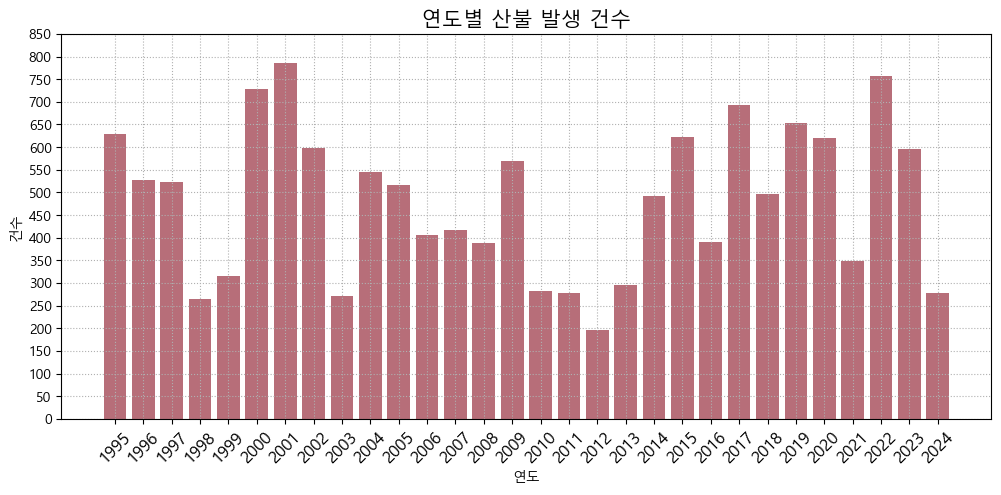

In [13]:
# ----------------------------------------
# 연도별 산불 발생 건수 시각화
# color = '#B76E79'
# ----------------------------------------

y = df[('원인 (건)'), '합계']
plt.bar(df.index, y, color = '#B76E79')
plt.grid(True, ls=':')
plt.xlabel('연도')
plt.ylabel('건수')
plt.title('연도별 산불 발생 건수', fontsize = 15)
plt.xticks(range(1995,2025,1), rotation = 45, fontsize = 12)
plt.yticks(range(0,900,50))
pass

In [14]:
df

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    0    138     0     0    34     18     0  128    630   
1996        527   248    0     73     0     0    38     30     0  138    527   
1997        524   247    0    103    41    29    33     10     0   61    524   
1998        265   104    0     65    24    13    16     11     0   32    265   
1999        315   156    0     57    13    21    20     10     0   38    315   
2000        729   312    0    134    68    63    47     18     0   87    729   
2001        785   354    0    143    47    88    45     24     0   84    785   
2002        599   217    0    110    58    60    63     20     0   71    599   
2003        271    93    0     55    24    43    31      4     0   21    271   
2004        544   250    0     83    47    51    22     13     0   78    544   
2005        516   232    0     95    41    60    24     13     0   51      0   
2006        405   185    0     63    40    26    12     14     0   65      0   
2007        418   193    0     92    21    37    23      7     0   45    418   
2008        389   148    0     62    44    49    26      6     0   54    389   
2009        570   222    0     94    67    34    36      6     0  111    570   
2010        282   138    0     38    34    13    15      1    14   29    282   
2011        277   110    0     66    39    12    11      3    11   25    277   
2012        197    87    0     18    13     8     7      3     7   54    197   
2013        296    91    0     77    41    22     9      4     5   47    296   
2014        492   198    0     98    68    26     9      2     9   82    492   
2015        623   193    0     99    86    22    19      5    13  186    623   
2016        391   107    0     79    80    14    18      1    13   79    391   
2017        692   254    0     94   110    24    22      2    36  150    692   
2018        496   158    0     67    58    12    26      1    41  133    496   
2019        653   179    0     69    89    22    20      2    59  213    653   
2020        620   217    0     49    65    75     9      1    54  150    620   
2021        349   133    0     22    27    34    16      3    20   94    349   
2022        756   253    0     44    59    53    14      0    51  282    756   
2023        596   170    0     56    73    56    23      1    41  176    596   
2024        279    49    0     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   0  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   0  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   0  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   0  
2008        226.90     4580      436054        6   6   0  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   0  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

## 산불피해현황

### 연도별 산불 피해 면적

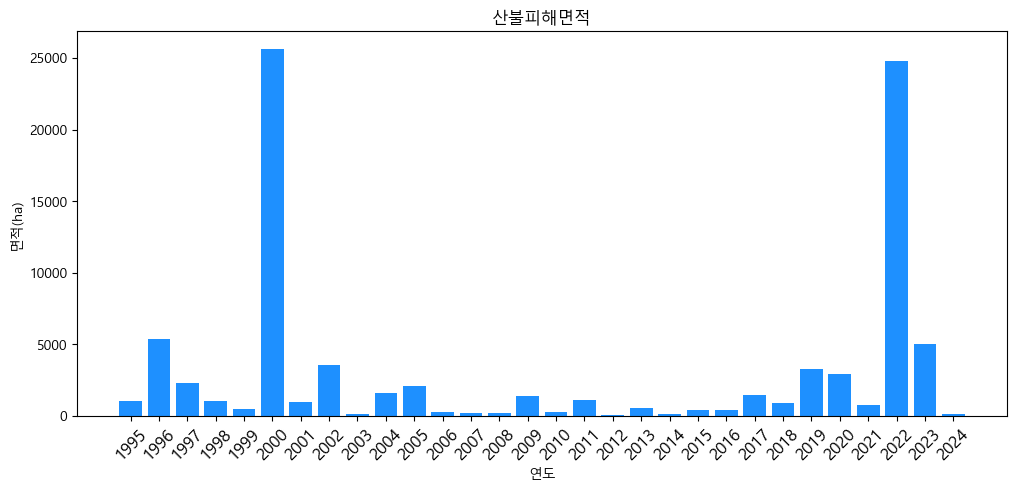

In [15]:
# ----------------------------------------
# 시각화 
# color='#1E90FF'
# ----------------------------------------
y = df[('산불피해', '면적 (ha)')]
plt.bar(df.index, y, color='#1E90FF')
plt.xlabel('연도')
plt.ylabel('면적(ha)')
plt.title('산불피해면적')
plt.xticks(range(1995,2025,1), rotation = 45, fontsize = 12)
plt.yticks(range(0,30000,5000))
pass

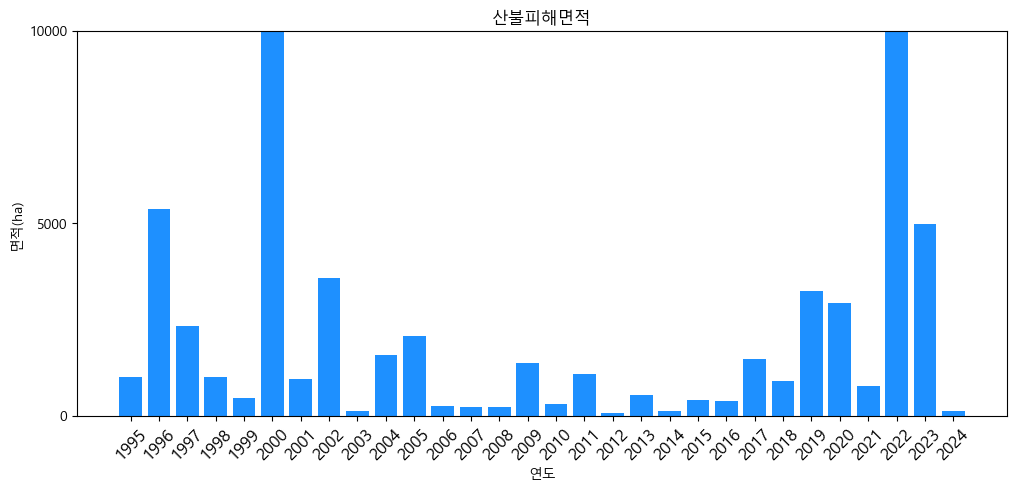

In [16]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------
y = df[('산불피해', '면적 (ha)')]
plt.bar(df.index, y, color='#1E90FF')
plt.xlabel('연도')
plt.ylabel('면적(ha)')
plt.title('산불피해면적')
plt.xticks(range(1995,2025,1), rotation = 45, fontsize = 12)
plt.yticks(range(0,30000,5000))
plt.ylim(0,10000)
pass


In [17]:
df

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    0    138     0     0    34     18     0  128    630   
1996        527   248    0     73     0     0    38     30     0  138    527   
1997        524   247    0    103    41    29    33     10     0   61    524   
1998        265   104    0     65    24    13    16     11     0   32    265   
1999        315   156    0     57    13    21    20     10     0   38    315   
2000        729   312    0    134    68    63    47     18     0   87    729   
2001        785   354    0    143    47    88    45     24     0   84    785   
2002        599   217    0    110    58    60    63     20     0   71    599   
2003        271    93    0     55    24    43    31      4     0   21    271   
2004        544   250    0     83    47    51    22     13     0   78    544   
2005        516   232    0     95    41    60    24     13     0   51      0   
2006        405   185    0     63    40    26    12     14     0   65      0   
2007        418   193    0     92    21    37    23      7     0   45    418   
2008        389   148    0     62    44    49    26      6     0   54    389   
2009        570   222    0     94    67    34    36      6     0  111    570   
2010        282   138    0     38    34    13    15      1    14   29    282   
2011        277   110    0     66    39    12    11      3    11   25    277   
2012        197    87    0     18    13     8     7      3     7   54    197   
2013        296    91    0     77    41    22     9      4     5   47    296   
2014        492   198    0     98    68    26     9      2     9   82    492   
2015        623   193    0     99    86    22    19      5    13  186    623   
2016        391   107    0     79    80    14    18      1    13   79    391   
2017        692   254    0     94   110    24    22      2    36  150    692   
2018        496   158    0     67    58    12    26      1    41  133    496   
2019        653   179    0     69    89    22    20      2    59  213    653   
2020        620   217    0     49    65    75     9      1    54  150    620   
2021        349   133    0     22    27    34    16      3    20   94    349   
2022        756   253    0     44    59    53    14      0    51  282    756   
2023        596   170    0     56    73    56    23      1    41  176    596   
2024        279    49    0     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   0  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   0  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   0  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   0  
2008        226.90     4580      436054        6   6   0  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   0  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

### 연도별 산불 피해 금액

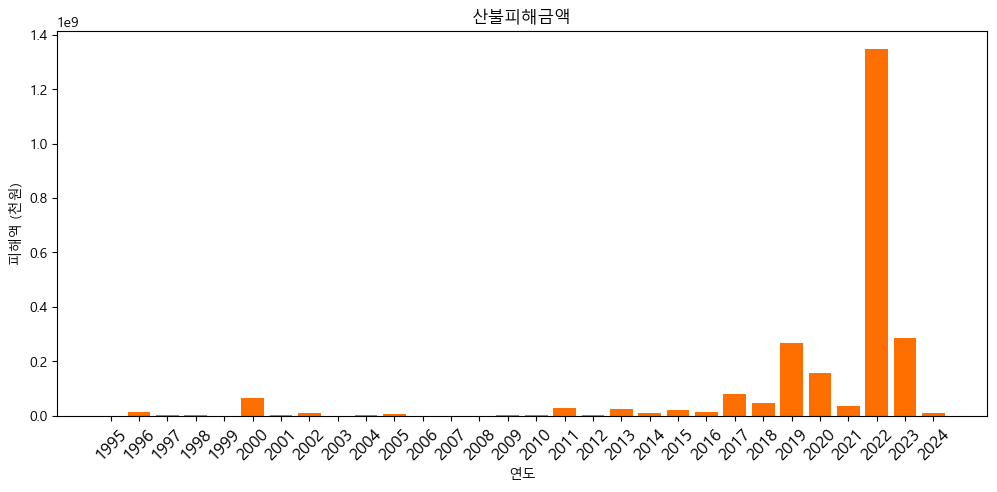

In [18]:
# ----------------------------------------
# 시각화
# color='#FF6F00'
# ----------------------------------------

y = df[('산불피해', '피해액 (천원)')]
plt.bar(df.index, y, color='#FF6F00')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')
plt.title('산불피해금액')
plt.xticks(range(1995,2025,1), rotation = 45, fontsize = 12)
pass

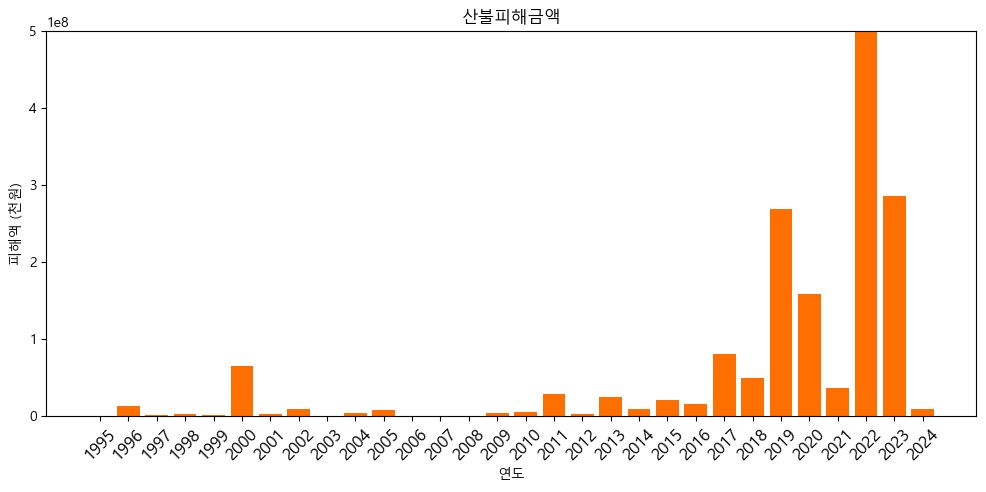

In [19]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------
y = df[('산불피해', '피해액 (천원)')]
plt.bar(df.index, y, color='#FF6F00')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')
plt.title('산불피해금액')
plt.xticks(range(1995,2025,1), rotation = 45, fontsize = 12)
plt.ylim(0,500000000)
pass


In [20]:
df

원인 (건)                                                         산불피해  \
             합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
(시점, 시점)                                                                       
1995        630   312    0    138     0     0    34     18     0  128    630   
1996        527   248    0     73     0     0    38     30     0  138    527   
1997        524   247    0    103    41    29    33     10     0   61    524   
1998        265   104    0     65    24    13    16     11     0   32    265   
1999        315   156    0     57    13    21    20     10     0   38    315   
2000        729   312    0    134    68    63    47     18     0   87    729   
2001        785   354    0    143    47    88    45     24     0   84    785   
2002        599   217    0    110    58    60    63     20     0   71    599   
2003        271    93    0     55    24    43    31      4     0   21    271   
2004        544   250    0     83    47    51    22     13     0   78    544   
2005        516   232    0     95    41    60    24     13     0   51      0   
2006        405   185    0     63    40    26    12     14     0   65      0   
2007        418   193    0     92    21    37    23      7     0   45    418   
2008        389   148    0     62    44    49    26      6     0   54    389   
2009        570   222    0     94    67    34    36      6     0  111    570   
2010        282   138    0     38    34    13    15      1    14   29    282   
2011        277   110    0     66    39    12    11      3    11   25    277   
2012        197    87    0     18    13     8     7      3     7   54    197   
2013        296    91    0     77    41    22     9      4     5   47    296   
2014        492   198    0     98    68    26     9      2     9   82    492   
2015        623   193    0     99    86    22    19      5    13  186    623   
2016        391   107    0     79    80    14    18      1    13   79    391   
2017        692   254    0     94   110    24    22      2    36  150    692   
2018        496   158    0     67    58    12    26      1    41  133    496   
2019        653   179    0     69    89    22    20      2    59  213    653   
2020        620   217    0     49    65    75     9      1    54  150    620   
2021        349   133    0     22    27    34    16      3    20   94    349   
2022        756   253    0     44    59    53    14      0    51  282    756   
2023        596   170    0     56    73    56    23      1    41  176    596   
2024        279    49    0     24    28    36     6      1    14  121    279   

                                        인명피해 (명)          
           면적 (ha)   재적 (㎥)    피해액 (천원)       합계  사망  부상  
(시점, 시점)                                                  
1995       1013.27     5452      450678       26  25   1  
1996       5367.63   363471    13321974       26  24   2  
1997       2329.79    40815     1628712       30  24   6  
1998       1014.00    44092     2516219       16  15   1  
1999        472.79     6377      665661        5   5   0  
2000      25606.75  1373302    65241772       30  13  17  
2001        962.22    33753     2717181       20  13   7  
2002       3588.15   162819     8952928       19  12   7  
2003        132.84     2444      276583        9   9   0  
2004       1587.89    52787     4068651       11  10   1  
2005       2066.58   113830     7526217       10  10   0  
2006        254.23     7808      432755        5   4   1  
2007        230.40     6467      377296        9   9   0  
2008        226.90     4580      436054        6   6   0  
2009       1380.58    91626     3882701        9   5   4  
2010        296.84    11168     4450914        2   2   0  
2011       1089.53    52544    29062872        3   2   1  
2012         71.91     2467     2541534        2   1   1  
2013        551.78    66765    25019788       36   3  33  
2014        136.92     6962     9284595       10   7   3  
2015       

### 연도별 인명 피해 현황

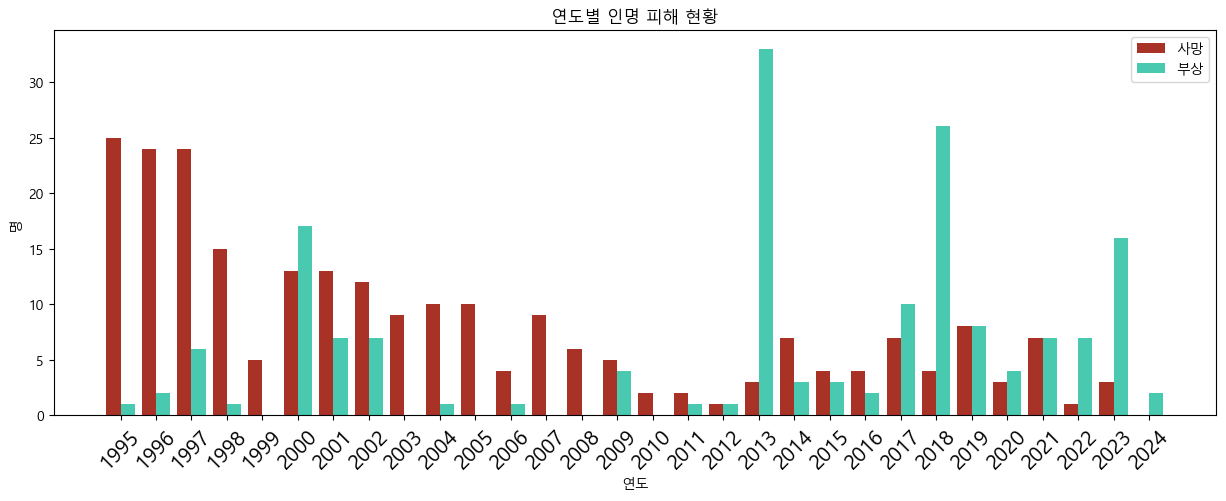

In [21]:
# ----------------------------------------
# 사망, 부상
# color='#A93226'
# color='#48C9B0'
# ----------------------------------------
x = df.index
y1 = df[('인명피해 (명)', '사망')]
y2 = df[('인명피해 (명)', '부상')]

plt.figure(figsize = (15,5))
plt.bar(x-0.2, y1, label='사망', color='#A93226', width=0.4)
plt.bar(x+0.2, y2, label='부상', color='#48C9B0', width=0.4)
plt.legend()
plt.xlabel('연도')
plt.ylabel('명')
plt.title('연도별 인명 피해 현황')
plt.xticks(range(1995,2025), rotation = 45, fontsize = 15)
pass

## 산불 원인

In [22]:
# ---------------------------------
# 산불 원인 컬럼만 가져와서 서브셋 생성
# ---------------------------------

cols = df.columns[[1,3,4,5,6,7,8,9]].copy()

df_cause = df.loc[:, cols]
df_cause.head()


원인 (건)                                           
          입산자실화 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타
(시점, 시점)                                                  
1995        312    138     0     0    34     18     0  128
1996        248     73     0     0    38     30     0  138
1997        247    103    41    29    33     10     0   61
1998        104     65    24    13    16     11     0   32
1999        156     57    13    21    20     10     0   38

In [23]:
# ---------------------------------
# 컬럼명 정리
# 중첩컬럼에서 1레벨 컬럼만 선택 : get_level_values(1)
# ---------------------------------

df_cause.columns = df_cause.columns.get_level_values(1)

In [24]:
df_cause.head()

,입산자실화,논밭두렁소각,쓰레기소각,담뱃불실화,성묘객실화,어린이불장난,건축물화재,기타
"(시점, 시점)",,,,,,,,
1995,312,138,0,0,34,18,0,128
1996,248,73,0,0,38,30,0,138
1997,247,103,41,29,33,10,0,61
1998,104,65,24,13,16,11,0,32
1999,156,57,13,21,20,10,0,38


In [25]:
# ---------------------------------
# 컬럼별 평균 건수 
#   - 데이터프레임.mean()
#   - 내림차순 정렬
# ---------------------------------

cause_mean = df_cause.mean().sort_values(ascending=False)
cause_mean

입산자실화     187.000000
기타         96.166667
논밭두렁소각     75.566667
쓰레기소각      46.833333
담뱃불실화      33.433333
성묘객실화      23.133333
건축물화재      12.933333
어린이불장난      7.800000
dtype: float64

In [26]:
# ---------------------------------
# 원인별 컬러
# ---------------------------------

wildfire_colors = {
    '입산자실화':   '#A93226',  
    '기타':         '#E59866',  
    '논밭두렁소각': '#F7DC6F', 
    '쓰레기소각':   '#1B4F72', 
    '담뱃불실화':   '#52BE80',  
    '성묘객실화':   '#BA4A00', 
    '건축물화재':   '#5D6D7E', 
    '어린이불장난': '#A569BD'  
}

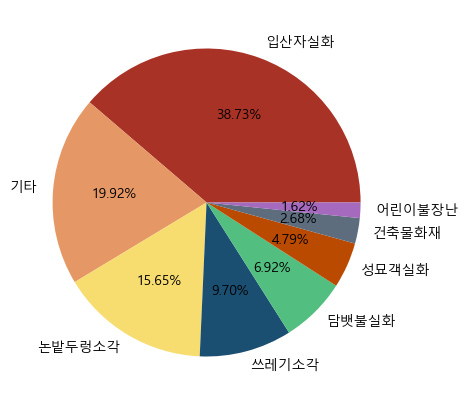

In [27]:
# ---------------------------------
# 시각화 (파이그래프)
# ---------------------------------

values = cause_mean.values
labels = cause_mean.index
colors = [wildfire_colors[i] for i in labels]

plt.pie(values,
        labels=labels,
        colors=colors,
        autopct='%.2f%%')
pass


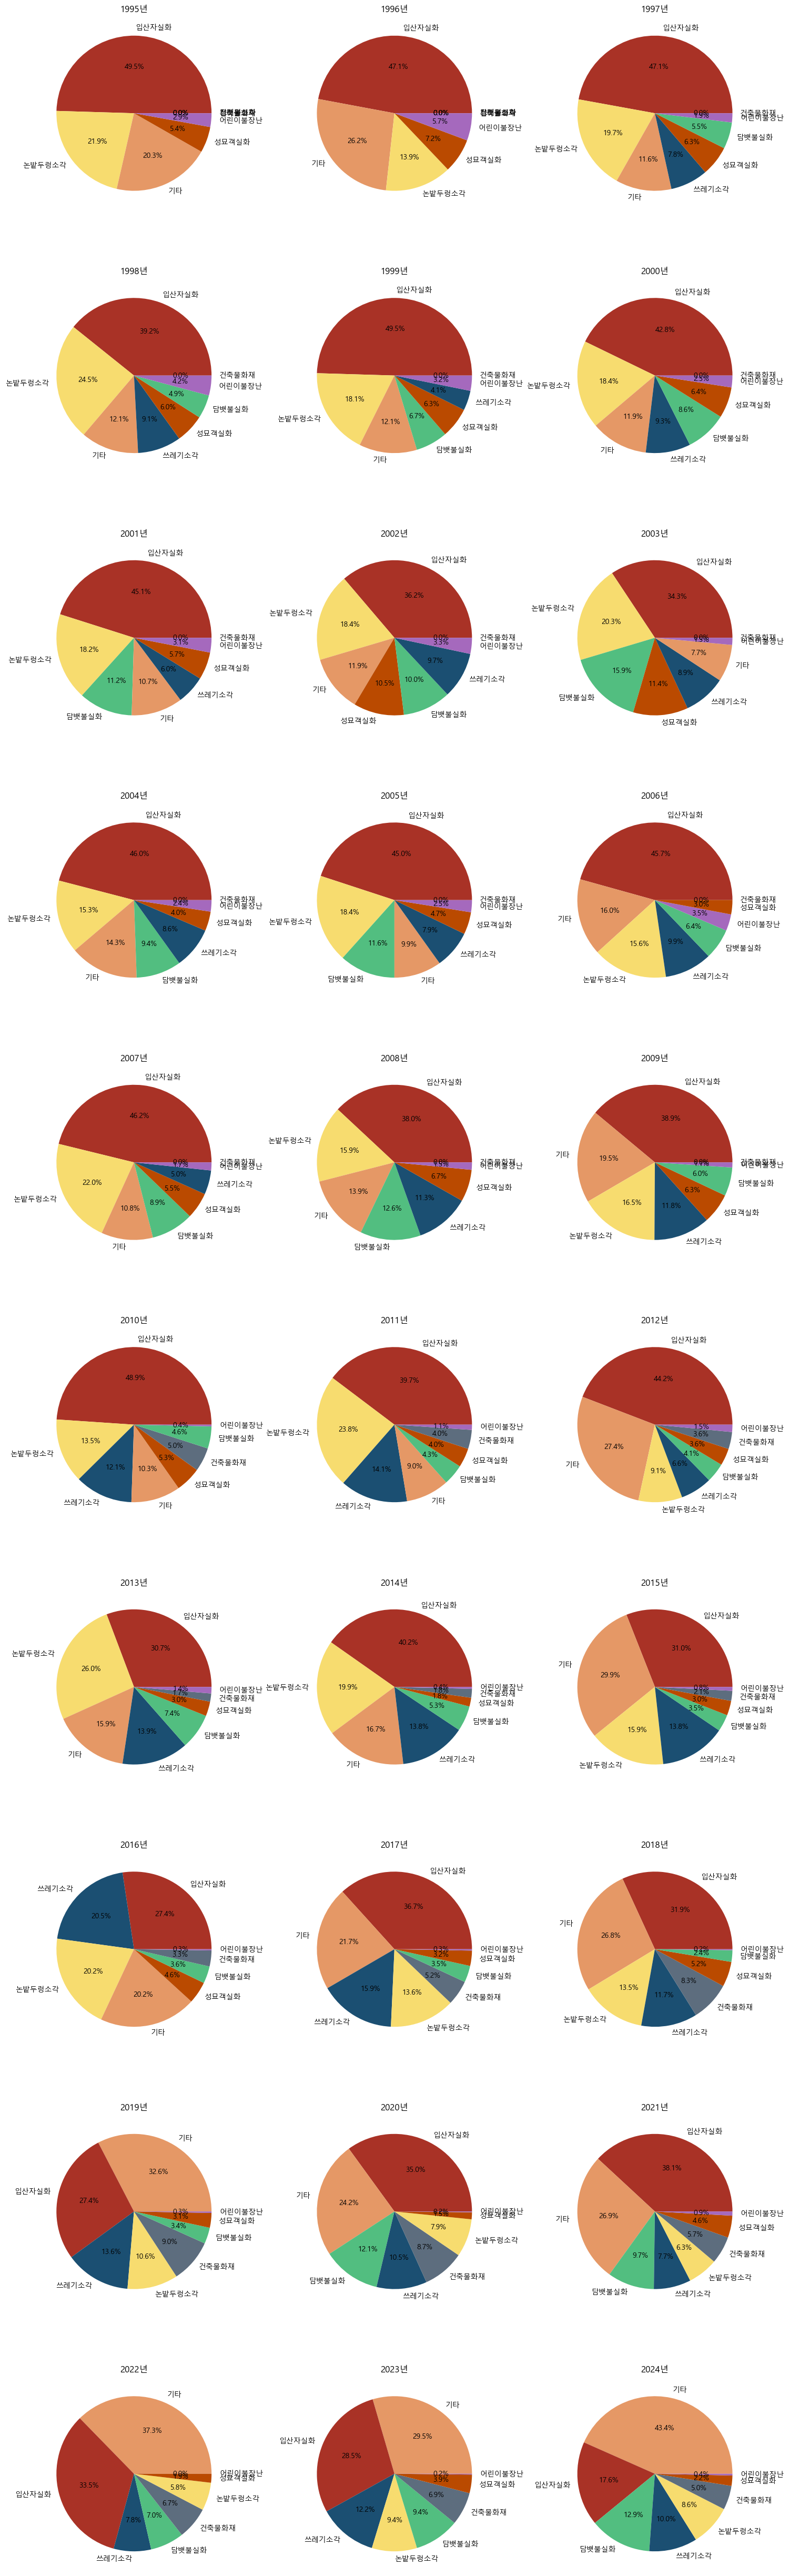

In [28]:
# ---------------------------------
# 연도별 시각화
# 서브플롯
#   - 10행 3열
# ---------------------------------

fig, axes = plt.subplots(10,3,figsize=(15,50))
flat_axes = axes.flatten() # 반복을 위해 flatten
# i = 0 # axex index

for i, year in enumerate(df_cause.index):
    data = df_cause.loc[year,:].sort_values(ascending=False)
    labels = data.index
    colors = [wildfire_colors[label] for label in labels]
    flat_axes[i].pie(data.values,
                     labels = labels,
                     autopct='%.1f%%',
                     colors=colors)    
    flat_axes[i].set_title(f'{year}년')


plt.tight_layout()

# 📊 산불 데이터 분석 보고서

## 1. 산불 원인별 변화 추이
- **규반소각**: 발생 사례가 전무하여 컬럼 자체를 삭제.
- **어린이 불장난**: 근래 들어 확연히 감소.  
  → 좋은 교육 효과와 더불어, 어린이들이 산에서 노는 경우가 줄어든 영향으로 해석 가능.
- **건축물 화재**: 과거보다 증가하는 추세.  
  → 사회적 불만을 가진 일부 사람들이 건축물에 방화를 저지르는 사례가 늘어난 것으로 추정.

---

## 2. 연도별 산불 발생 건수
- **최소 발생 연도**: 2012년 — 200건 미만
- **최대 발생 연도**: 2001년 — 750건 이상  
- 연도별 편차는 크지만, 시간 흐름에 따른 뚜렷한 증가·감소 추이는 없음.

---

## 3. 발생 건수와 피해면적의 관계
- **2001년**: 건수는 최다였지만 피해면적은 작음.
- **2000년**: 피해면적이 가장 넓음.
- 원인 빈도는 비슷했으나, 개별 산불의 규모 차이로 피해면적이 크게 달라질 수 있음.  
  → **단순 건수만으로 피해 정도를 판단하는 것은 부적절**.

---

## 4. 2022년 피해 특성
- 피해면적: 2000년과 비슷하게 매우 넓음.
- **재적(材積)**: 2022년이 압도적으로 큼.  
  → 재적은 목재·통나무·원목 등의 부피(㎥ 단위)를 의미하며, 면적과 비례하나 목재 피해 규모를 더 직접적으로 반영.
- 피해금액: 재적에 비례하여 2022년이 압도적 1위.  
  - 피해액이 너무 커서 시각화 시 다른 연도 그래프가 작아보이는 부작용 발생.  
  - 스케일 조정 후, **2019년·2023년** 피해액이 2000년보다 큰 것을 확인.
  - 이는 경제 성장으로 인해 **작은 산불도 높은 피해액**으로 산정되는 경향을 시사.

---

## 5. 인명 피해 분석
- 사망자 수: 과거에 비해 크게 감소.
- 부상자 수: 소폭 증가.  
  → 현대 의학의 발전으로 과거 사망에 이를 수준의 부상이 부상으로 경감된 영향으로 해석 가능.

---

## 6. 산불 원인 비중 변화
- 총합 기준:
  1. **입산자실화**가 가장 큼.
  2. **기타**, **논밭두렁소각** 순.
  - *기타*는 세부 내용 파악 불가로 분석에서 제외.
  - 입산자실화는 산에서의 화기 사용을 더욱 엄격히 제한할 필요 있음.
  - 논밭두렁소각은 고령층 농업 종사자 비중이 높아 경각심이 낮을 수 있음 → **지역 차원의 교육 필요**.

---

## 7. 1995년 vs 2024년 비교
- **1995년**:
  - 1위: 입산자실화 (~50%)
  - 2위: 논밭두렁소각 (~22%)
- **2024년**:
  - 1위: 입산자실화 (~18%)
  - 2위: 담뱃불실화 (~13%)

### 시사점
- 입산자실화 비중은 **꾸준한 교육과 시민의식 향상**으로 감소.
- 2위 원인이 논밭두렁소각에서 담뱃불실화로 교체.  
  → 과거에는 낮았던 담뱃불실화 비율이 최근 상승.  
  → 전반적인 시민의식은 개선되었으나, **흡연자의 화재 안전 의식은 오히려 악화**.  
    → 흡연자들의 경각심 제고 필요.
